In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/nba-games/nba_games.csv')
df

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5
...,...,...,...,...,...,...,...,...,...,...,...
24354,201504280LAC,2015,Spurs,Clippers,A,1,111,107,W,0.383515,4
24355,201504290ATL,2015,Nets,Hawks,A,1,97,107,L,0.238122,-10
24356,201504300SAS,2015,Spurs,Clippers,H,1,96,102,L,0.684116,-6
24357,201505010BRK,2015,Nets,Hawks,H,1,87,111,L,0.484831,-24


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import pearsonr, chi2_contingency

In [5]:
df_2010 = df[df.year_id == 2010]
df_2014 = df[df.year_id == 2014]

In [6]:
# Compare teams based on points per game

knicks_pts = df_2010.pts[df.fran_id=="Knicks"]
nets_pts = df_2010.pts[df.fran_id=="Nets"]

In [15]:
# Difference between the two teams' average points scored:

knicks_mean_2010 = np.mean(knicks_pts)
nets_mean_2010 = np.mean(nets_pts)
diff_means_2010 = knicks_mean_2010 - nets_mean_2010
diff_means_2010

9.731707317073173

In [14]:
# Median: 

knicks_median_2010 = np.median(knicks_pts)
nets_median_2010 = np.median(nets_pts)
diff_medians_2010 = knicks_median_2010 - nets_median_2010
diff_medians_2010

8.5

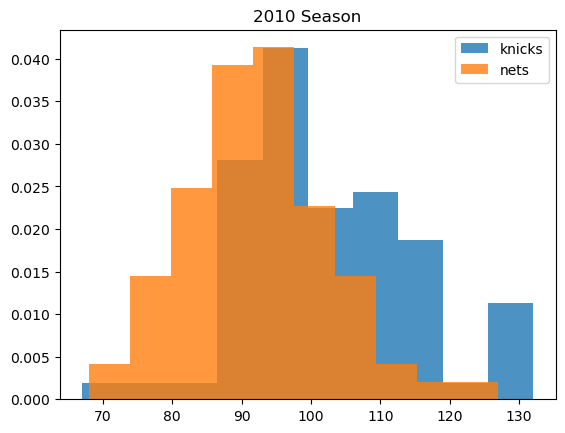

In [13]:
# Plot points scored for the Knicks compared to the Nets

plt.hist(knicks_pts, alpha=0.8, density = True, label='knicks')
plt.hist(nets_pts, alpha=0.8, density = True, label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()

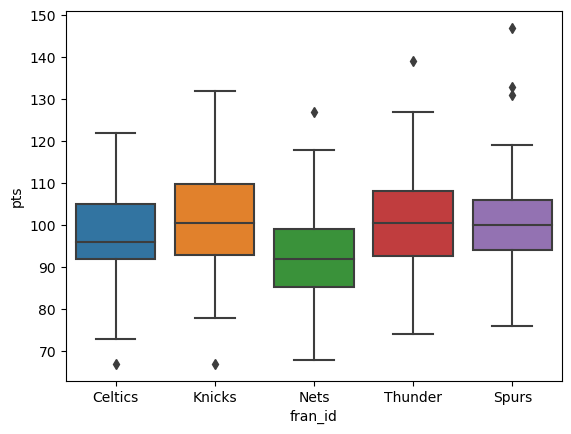

In [43]:
sns.boxplot(data = df_2010, x = 'fran_id', y = 'pts')
plt.show()

In [18]:
# The distribution don't look the same and it appears that knicks have scored more than the nets on average in 2010.
# Now we compare 2010 to 2014

knicks_pts_2014 = df_2014.pts[df.fran_id=="Knicks"]
nets_pts_2014 = df_2014.pts[df.fran_id=="Nets"]

In [19]:
knicks_mean_2014 = np.mean(knicks_pts_2014)
nets_mean_2014 = np.mean(nets_pts_2014)
diff_means_2014 = knicks_mean_2014 - nets_mean_2014
diff_means_2014

0.44706798131809933

In [20]:
knicks_median_2014 = np.median(knicks_pts_2014)
nets_median_2014 = np.median(nets_pts_2014)
diff_median_2014 = knicks_median_2014 - nets_median_2014
diff_median_2014

0.0

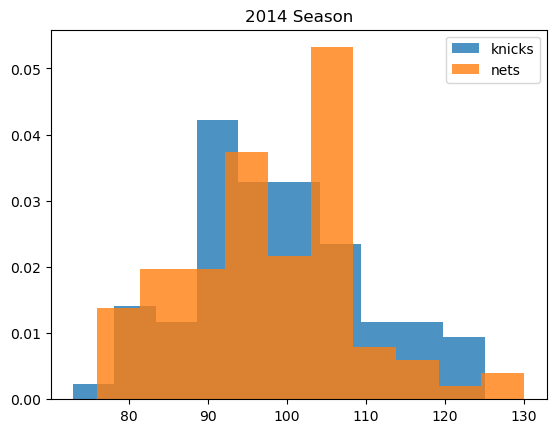

In [21]:
# Plot points scored for the Knicks compared to the Nets for Season 2014

plt.hist(knicks_pts_2014, alpha=0.8, density = True, label='knicks')
plt.hist(nets_pts_2014, alpha=0.8, density = True, label='nets')
plt.legend()
plt.title("2014 Season")
plt.show()

# It may seems that in 2014 the Nets improved the performance in 2014  

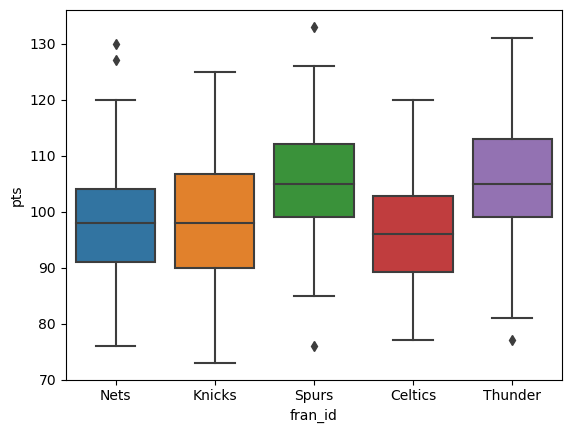

In [42]:
# In fact we can validate the same info comparing the boxplot 

sns.boxplot(data = df_2014, x = 'fran_id', y = 'pts')
plt.show()

In [28]:
# Teams tend to win more at home or away?

location_freq = pd.crosstab(df.game_result, df.game_location)
location_freq

game_location,A,H,N
game_result,,,
L,7105,4298,3
W,5003,7942,8


In [29]:
df.game_location.value_counts()

H    12240
A    12108
N       11
Name: game_location, dtype: int64

In [31]:
location_freq_prop = pd.crosstab(df.game_result, df.game_location, normalize = True)
location_freq_prop

game_location,A,H,N
game_result,,,
L,0.291679,0.176444,0.000123
W,0.205386,0.326040,0.000328


In [30]:
chi2, pval, dof, expected = chi2_contingency(location_freq)
print(expected)

[[5.66952042e+03 5.73132887e+03 5.15070405e+00]
 [6.43847958e+03 6.50867113e+03 5.84929595e+00]]


In [32]:
print(chi2)

1359.2878749575696


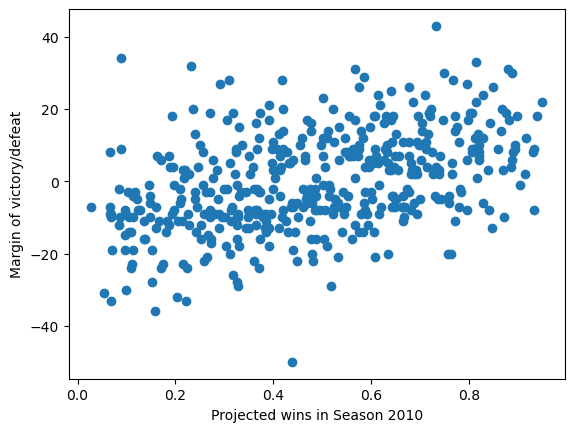

In [45]:
# If there is a pattern in the plot, the variables are associated

plt.scatter(x= df_2010.forecast, y= df_2010.point_diff)
plt.xlabel("Projected wins in Season 2010")
plt.ylabel("Margin of victory/defeat")
plt.show()

In [48]:
# Positive covariance indicates that a larger value of one variable is associated with a larger value of the other.

covariance = np.cov(df_2010.point_diff, df_2010.forecast)
print(covariance[0][1])

1.3746125676458802


In [49]:
# Highly associated variables with a positive linear relationship will have a correlation close to 1

correlation, p = pearsonr(df_2010.point_diff, df_2010.forecast)
correlation

0.4402088708468081